In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime 

In [2]:
#load in csv 
df = pd.read_csv("analyze_me.csv")

In [11]:
df.head(10)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,00:07:14.327405,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,00:04:49.413655,40.734858,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548
7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2.0,Cookies and Brownies,NaN,40.729791,-74.000589,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.66695,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521
8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,NaN,NaN,NaN,40.729357,-73.990156,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278


In [21]:
clean_df = df.dropna()

In [23]:
clean_df.head(5)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,00:07:14.327405,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,00:04:49.413655,40.734858,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548


In [33]:
#split the time it took to order on the decimal to convert to seconds. 
clean_df["how_long_it_took_to_order"] = clean_df["how_long_it_took_to_order"].str.split(pat='.', expand=True)

In [34]:
clean_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,00:07:14,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,00:04:49,40.734858,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,1379953,127103,69993,bicycle,The Grey Dog - University,Coffee,Organic Raw Veggies,1.0,Small Plates,00:04:34,40.733787,-73.993035,40.736760,-73.982048,2014-10-17 13:35:30.031409,2014-10-17 13:43:14.423209,2014-10-17 13:50:04.623095,2014-10-17 13:57:28.4103
5975,1475459,303211,156557,car,Big Nick's Burgers & Pizza,Pizza,Chicken Fingers,1.0,Appetizers & Side Orders,00:05:11,40.776767,-73.979120,40.793834,-73.941521,2014-10-28 19:47:25.887723,2014-10-28 19:48:56.165939,2014-10-28 20:11:46.097208,2014-10-28 20:25:02.133169
5977,1303444,228541,148268,bicycle,RedFarm Hudson,Chinese,Soft & Crunchy Vegetable Fried Rice,1.0,Rice & Noodles,00:03:32,40.734214,-74.006202,40.732425,-73.996269,2014-10-05 19:22:52.457615,2014-10-05 19:35:32.018316,2014-10-05 19:59:22.572157,2014-10-05 20:07:19.955589
5981,1470282,400983,142140,car,Omai,Vietnamese,Ca Tim,1.0,Appetizers,00:02:17,40.744408,-74.002891,40.734609,-74.006405,2014-10-27 20:25:03.592287,2014-10-27 20:22:37.822461,2014-10-27 20:39:25.770399,2014-10-27 20:50:45.259345


In [35]:
#Create list of converted values to iterate over and convert to time in seconds. 
order_time = clean_df["how_long_it_took_to_order"].tolist()

In [40]:
#convert time to decimal time 
converted_time = []
for i in range(len(order_time)):
    hhmmss = order_time[i]
    [hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
    x=datetime.timedelta(hours=hours, minutes=minutes,seconds=seconds)
    converted_time.append(x.seconds)

In [43]:
#add converted time into a column in the df. 
clean_df["order_time_seconds"] = converted_time

{'whiskers': [<matplotlib.lines.Line2D at 0x2cd9b7d2908>,
 'caps': [<matplotlib.lines.Line2D at 0x2cd9bfddcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cd997159c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2cd9bad5d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cd9b6c7748>],
 'means': []}

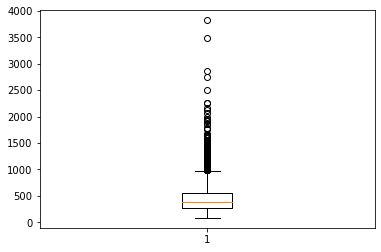

In [45]:
#Create boxplot of order time 
plt.boxplot(clean_df["order_time_seconds"])

In [10]:
#Count of all NaN in each column 
null = df.isnull().sum()
#Count all non null values 
notnull = df.count(axis=0)
#% of data that is null by column 
pct_null = (null/(null+notnull))*100
print(pct_null)

delivery_id                             0.000000
customer_id                             0.000000
jumpman_id                              0.000000
vehicle_type                            0.000000
pickup_place                            0.000000
place_category                         14.758482
item_name                              20.558248
item_quantity                          20.558248
item_category_name                     20.558248
how_long_it_took_to_order              49.222798
pickup_lat                              0.000000
pickup_lon                              0.000000
dropoff_lat                             0.000000
dropoff_lon                             0.000000
when_the_delivery_started               0.000000
when_the_Jumpman_arrived_at_pickup      9.192713
when_the_Jumpman_left_pickup            9.192713
when_the_Jumpman_arrived_at_dropoff     0.000000
dtype: float64


In [ ]:
#Formula to find distance between pickup and dropoff locations 
R = 6373.0

In [12]:
#find if there are duplicate values 
df.nunique()

delivery_id                            5214
customer_id                            3192
jumpman_id                              578
vehicle_type                              7
pickup_place                            898
place_category                           57
item_name                              2277
item_quantity                            11
item_category_name                      767
how_long_it_took_to_order              2579
pickup_lat                             1210
pickup_lon                             1179
dropoff_lat                            2841
dropoff_lon                            2839
when_the_delivery_started              5214
when_the_Jumpman_arrived_at_pickup     4719
when_the_Jumpman_left_pickup           4717
when_the_Jumpman_arrived_at_dropoff    5214
dtype: int64

In [14]:
duplicateRows = df[df.duplicated()]